In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def brazil_states(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection=projection))
    ax.set_extent([-82, -32, -45, 10])
    ax.stock_img()
    ax.add_feature(LAND)
    ax.add_feature(COASTLINE)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

TypeError: __init__() missing 1 required positional argument: 'crs'

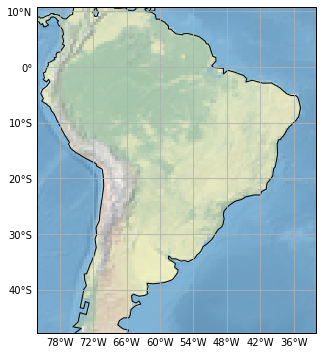

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

fname = r'simplified-land-polygons-complete-3857\simplified_land_polygons.shp'
fname = '/Users/danielmsheehan/Dropbox/General_Assembly/Projects/project_5/data/maps/census_tracts.shp'

# ax = plt.axes(projection=ccrs.Robinson())

fig, ax = brazil_states()

shape_feature = ShapelyFeature(
    Reader(fname).geometries(), 
    edgecolor='black',)
    #crs="")
                               # ccrs.PlateCarree(), )
ax.add_feature(shape_feature)

ax.show()



In [20]:
import geopandas as gpd

In [22]:
df = gpd.read_file(fname)

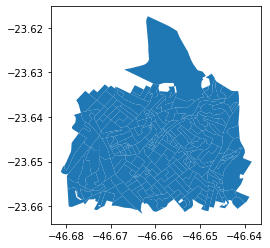

In [30]:
df.plot()

In [150]:
def brazil_states(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=projection))
    ax.set_extent([-46.6815, -46.638, -23.616, -23.662])  # (x0, x1, y0, y1
    ax.stock_img()
    
    stamen_terrain = cimgt.GoogleWTS()    # Stamen('terrain-background')
    ax.add_image(stamen_terrain, 8)

    #ax.add_feature(LAND)
    #ax.add_feature(COASTLINE)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

TypeError: Can't instantiate abstract class GoogleWTS with abstract methods _image_url

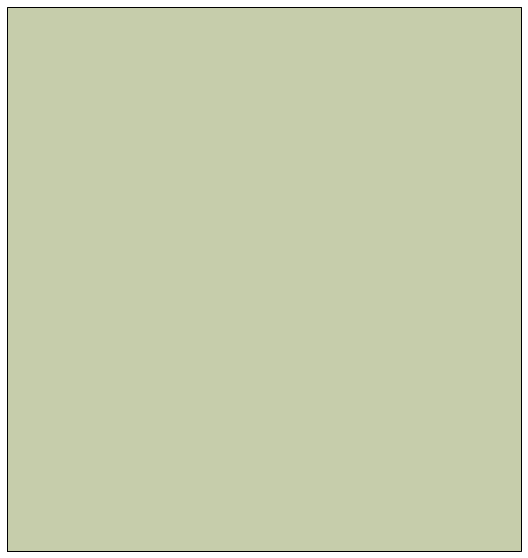

In [151]:
fig, ax = brazil_states()
df.plot(ax=ax, transform=ax.transData)
ax;

In [140]:
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

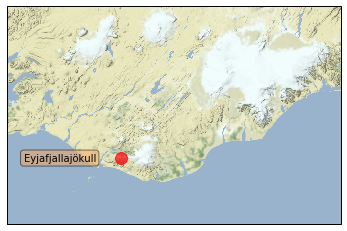

In [141]:
# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure()

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-22, -15, 63, 65], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 8)

# Add a marker for the Eyjafjallajökull volcano.
ax.plot(-19.613333, 63.62, marker='o', color='red', markersize=12,
        alpha=0.7, transform=ccrs.Geodetic())

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

# Add text 25 pixels to the left of the volcano.
ax.text(-19.613333, 63.62, u'Eyjafjallajökull',
        verticalalignment='center', horizontalalignment='right',
        transform=text_transform,
        bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
plt.show()